Assignment Date : 27 October 2022

Student Name : Jayaraj R

Student Roll No : 731119205013

Team ID : PNT2022TMID44369


Project Name :Visualizing and Predicting Heart Diseases with an Interactive Dash Board


Dataset : https://drive.google.com/file/d/1sIv-7x7CE0zAPAt0Uv-6pbO2ST2LVp5u/view

**LOADING THE DATASET**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline

In [ ]:
path = "/content/drive/MyDrive/abalone.csv"
df = pd.read_csv(path)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
df['age'] = df['Rings']+1.5
df = df.drop('Rings', axis = 1)

**VIZUALIZATIONS**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


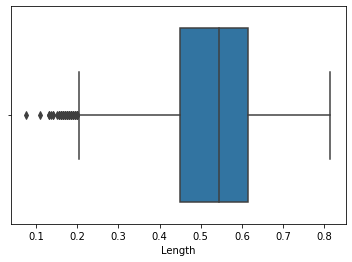

In [ ]:
#Univariate Analysis
sbn.boxplot(df.Length)

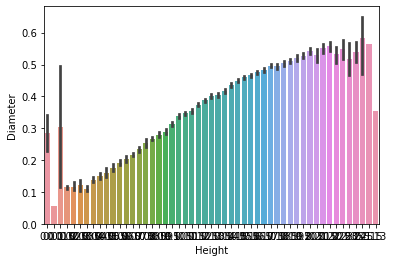

In [ ]:
#Bi-Variant Analysis
sbn.barplot(x=df.Height,y=df.Diameter)

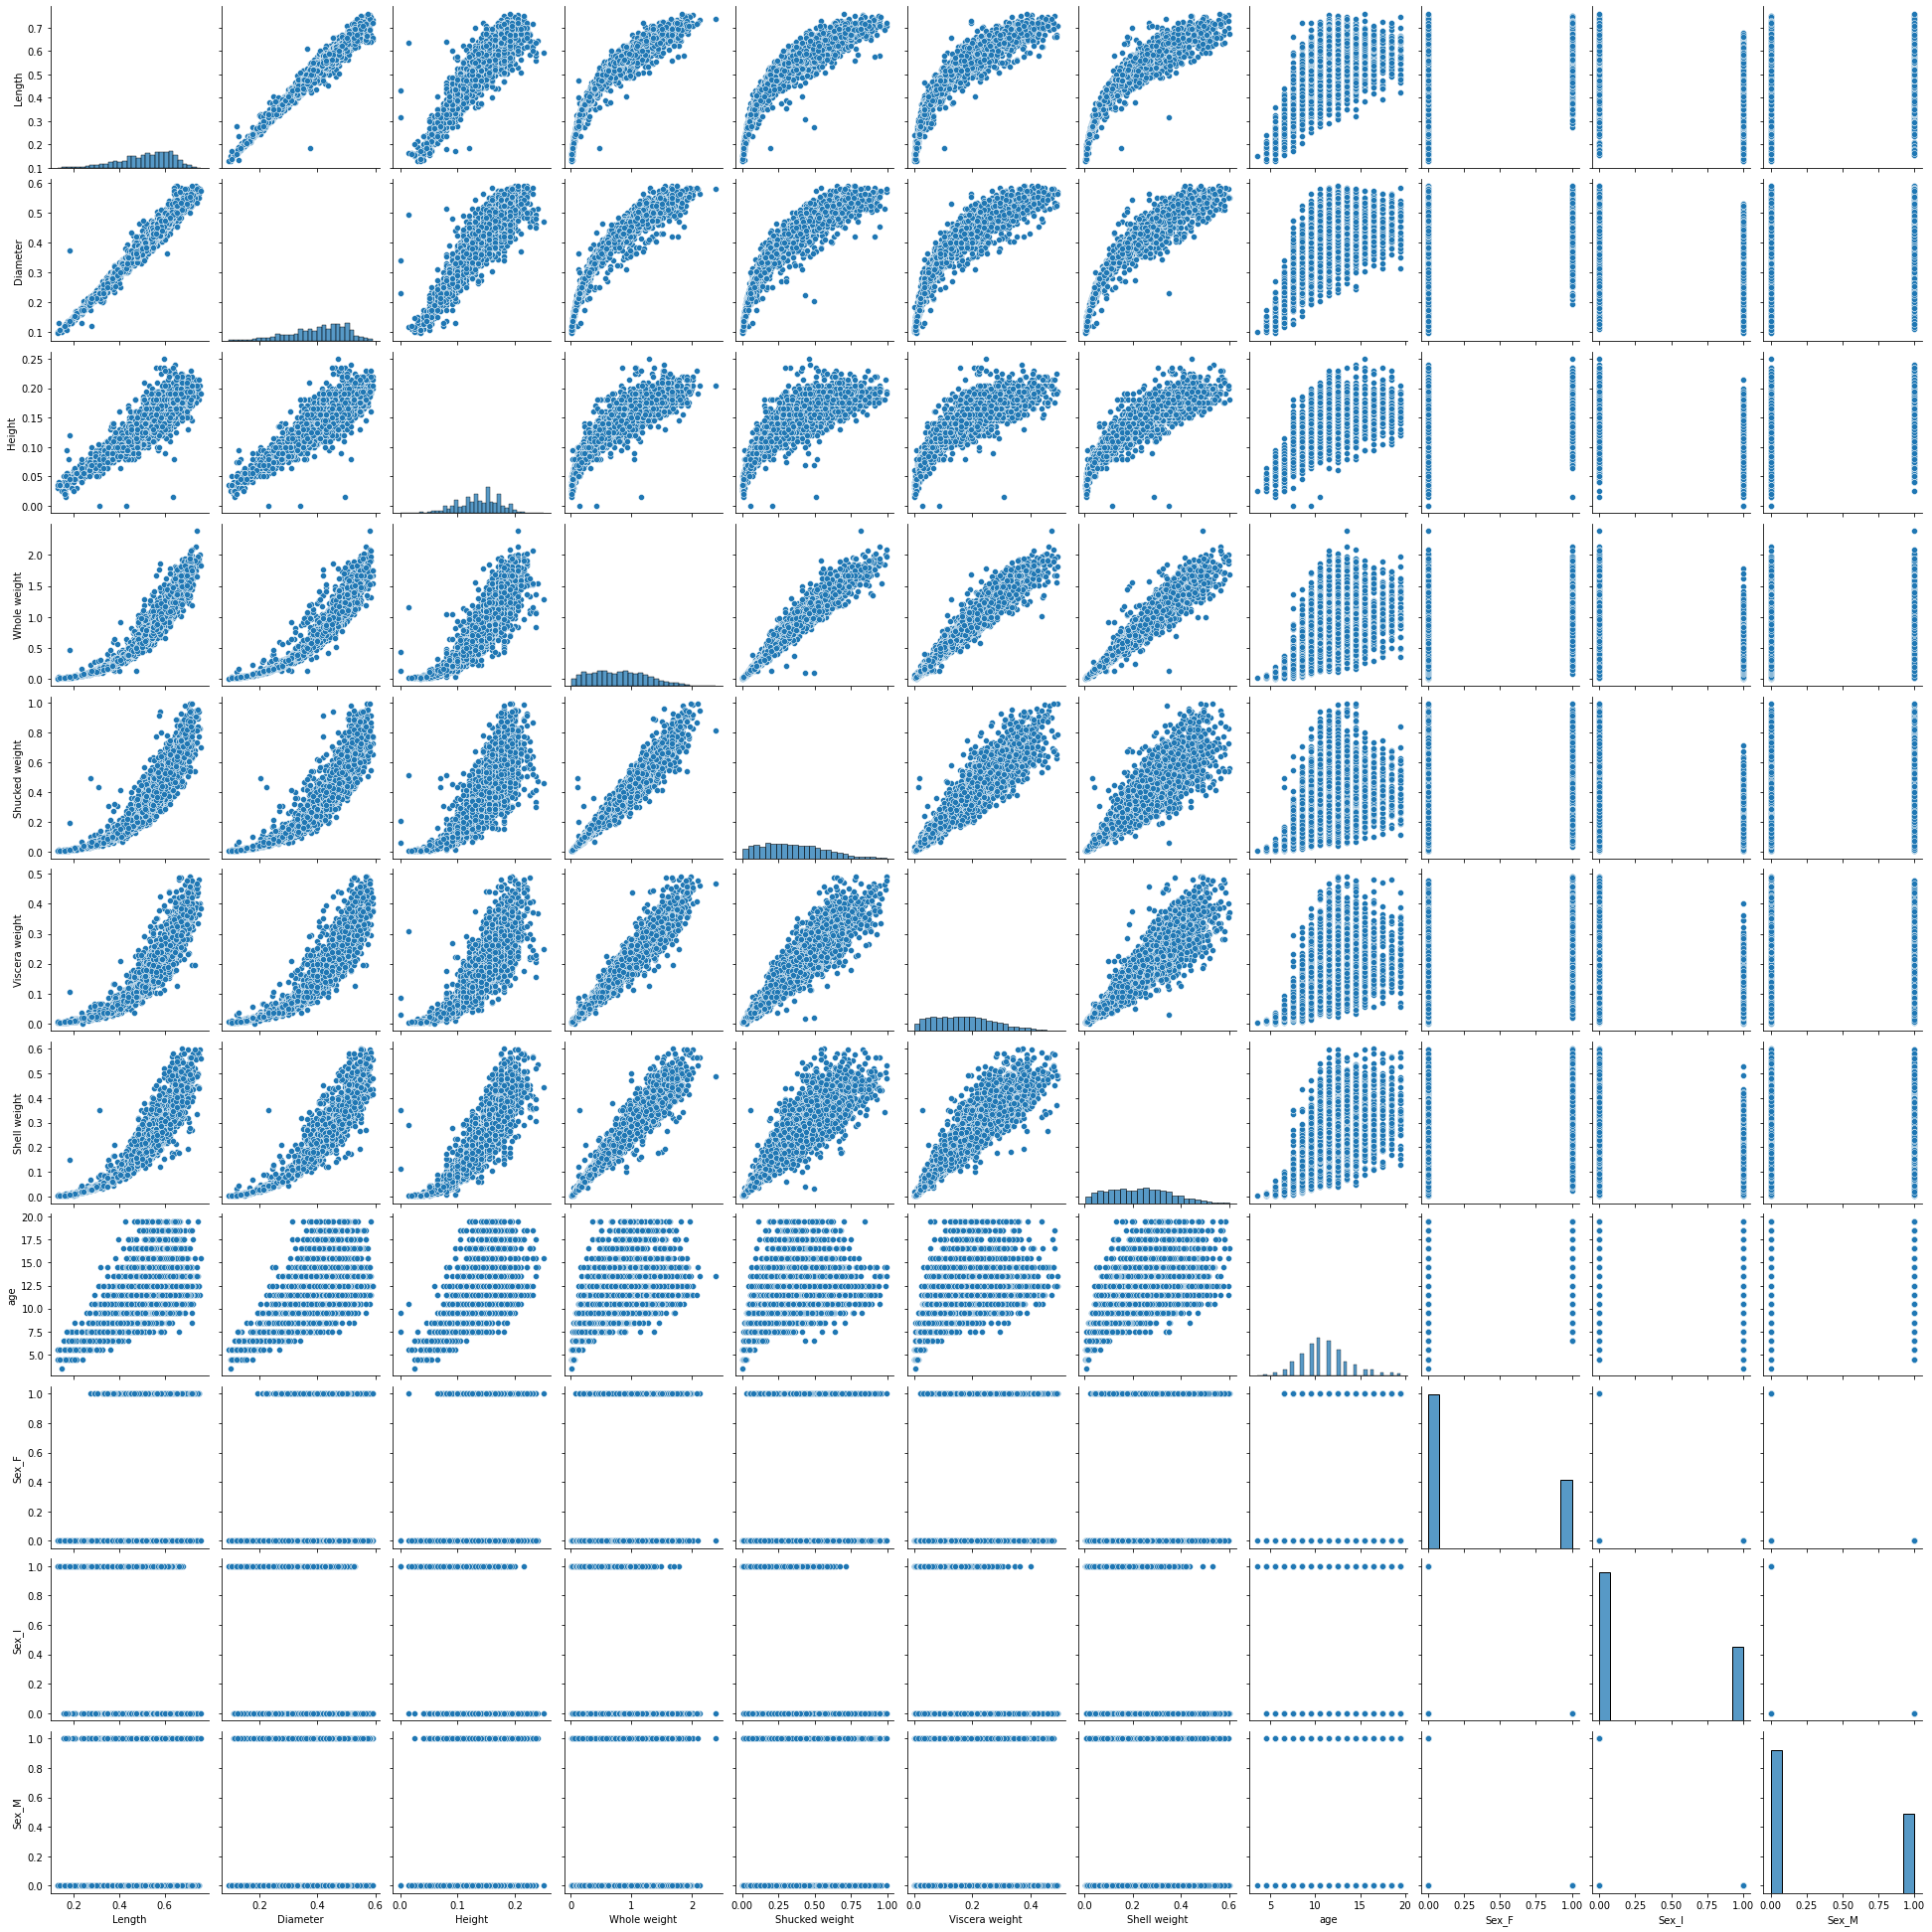

In [ ]:
#Multi-Variant Analysis
sbn.pairplot(df)

**Perform Descriptive Analysis On The Dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [ ]:
df['Height'].mean()

0.13951639932966242

In [ ]:
df['Diameter'].median()

0.425

In [ ]:
df['Length'].mode()

0    0.550
1    0.625
dtype: float64

In [ ]:
df.max()

Sex                    M
Length             0.815
Diameter            0.65
Height              1.13
Whole weight      2.8255
Shucked weight     1.488
Viscera weight      0.76
Shell weight       1.005
Rings                 29
dtype: object

In [ ]:
df.min()

Sex                    F
Length             0.075
Diameter           0.055
Height               0.0
Whole weight       0.002
Shucked weight     0.001
Viscera weight    0.0005
Shell weight      0.0015
Rings                  1
dtype: object

**Check For Missing Values & Deal With Them**

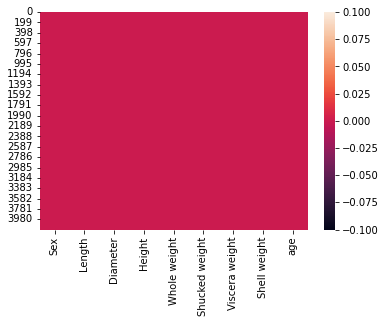

In [ ]:
#EDA
sbn.heatmap(df.isnull())

In [ ]:
numerical_features = df.select_dtypes(include = [np.number]).columns
categorical_features = df.select_dtypes(include = [np.object]).columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
numerical_features

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age'],
      dtype='object')

In [ ]:
categorical_features

Index(['Sex'], dtype='object')

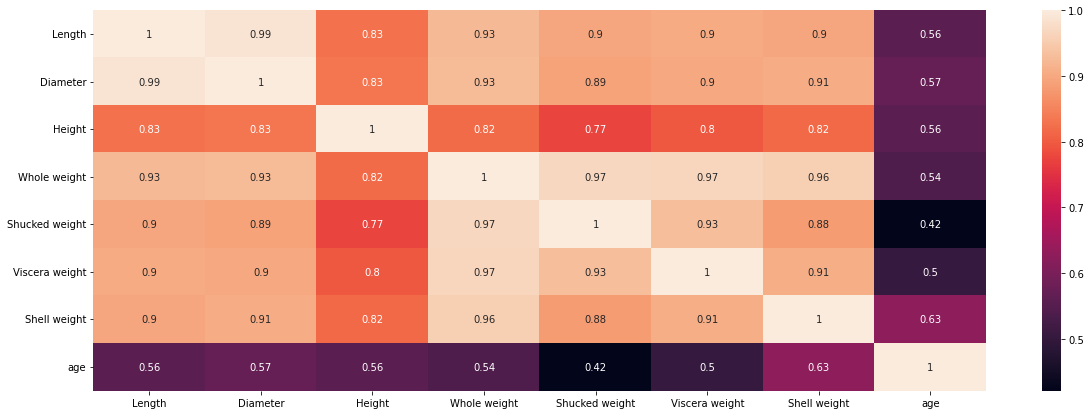

In [ ]:
plt.figure(figsize = (20,7))
sbn.heatmap(df[numerical_features].corr(),annot = True)

Whole Weight is almost linearly varying with all other features except age.
Height has least linearity with remaining features.
Age is most linearly proprtional with Shell Weight followed by Diameter and length.
Age is least correlated with Shucked Weight.

**KEY INSIGHT**
All numerical features but 'sex'
  - Though features are not normaly distributed, are close to normality
  - None of the features have minimum = 0 except Height (requires re-check)
  - Each feature has difference scale range

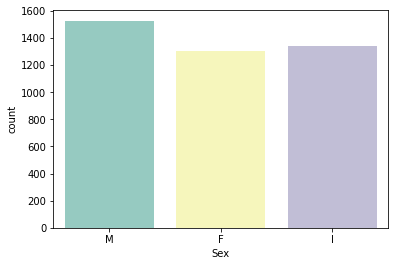

In [ ]:
sbn.countplot(x = 'Sex', data = df, palette = 'Set3')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 52.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 58.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


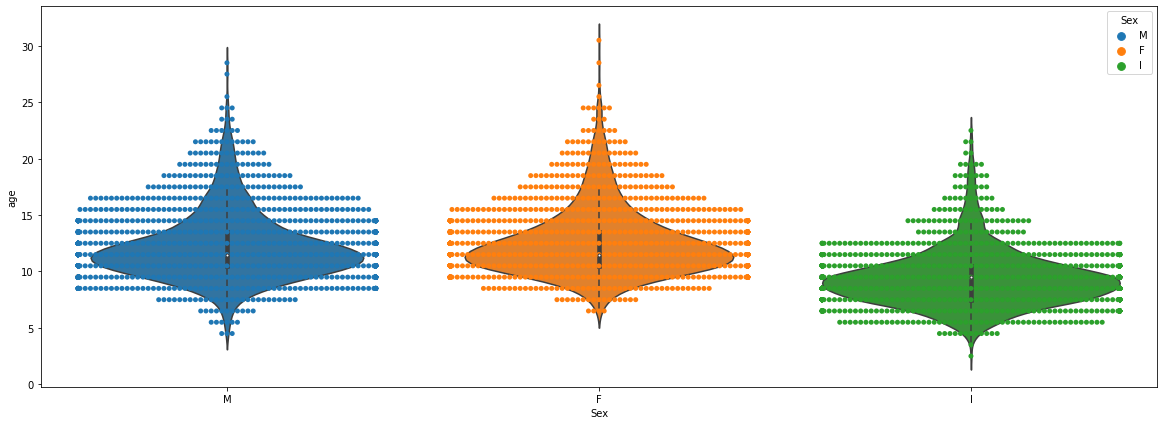

In [ ]:
plt.figure(figsize = (20,7))
sbn.swarmplot(x = 'Sex', y = 'age', data = df, hue = 'Sex')
sbn.violinplot(x = 'Sex', y = 'age',data = df)

Male : age majority lies in between 7.5 years to 19 years

Female: age majority lies in between 8 years to 19 years

Immature: age majority lies in between 6 years to < 10 years

**Find The Outliers & Replace Them**

In [ ]:
#Data Preprocessing
#Outlier handling
df = pd.get_dummies(df)
dummy_df = df

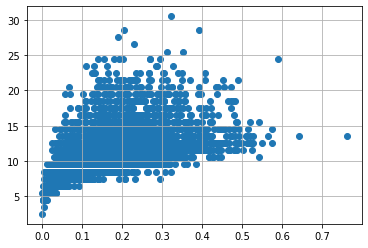

In [ ]:
var = 'Viscera weight'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

In [ ]:
df.drop(df[(df['Viscera weight'] > 0.5) &
          (df['age'] < 20)].index, inplace = True)
df.drop(df[(df['Viscera weight']<0.5) & (
df['age'] > 25)].index, inplace = True)

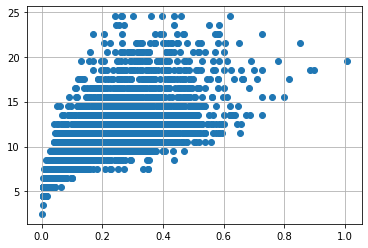

In [ ]:
var = 'Shell weight'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

In [ ]:
df.drop(df[(df['Shell weight'] > 0.6) & (df['age'] < 25)].index, inplace = True)
df.drop(df[(df['Shell weight']<0.8) & (df['age'] > 25)].index, inplace = True)

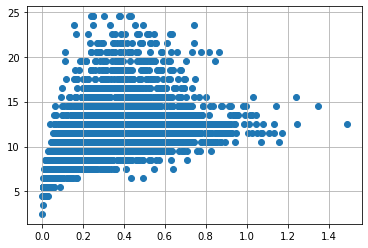

In [ ]:
var = 'Shucked weight'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

In [ ]:
df.drop(df[(df['Shucked weight'] >= 1) & (df['age'] < 20)].index, inplace = True)
df.drop(df[(df['Viscera weight']<1) & (df['age'] > 20)].index, inplace = True)

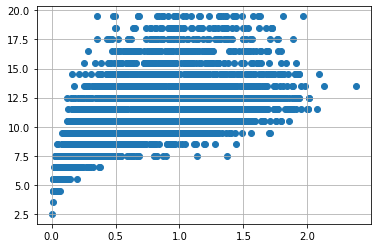

In [ ]:
var = 'Whole weight'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

In [ ]:
df.drop(df[(df['Whole weight'] >= 2.5) & (df['age'] < 25)].index, inplace = True)
df.drop(df[(df['Whole weight']<2.5) & (df['age'] > 25)].index, inplace = True)

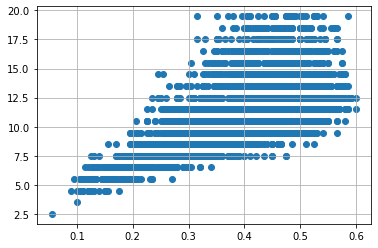

In [ ]:
var = 'Diameter'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

In [ ]:
df.drop(df[(df['Diameter'] <0.1) & (df['age'] < 5)].index, inplace = True)
df.drop(df[(df['Diameter']<0.6) & (df['age'] > 25)].index, inplace = True)
df.drop(df[(df['Diameter']>=0.6) & (df['age'] < 25)].index, inplace = True)

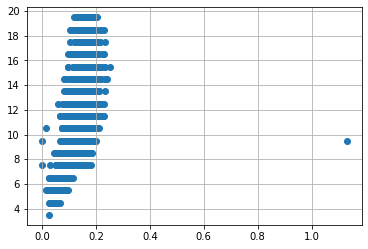

In [ ]:
var = 'Height'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

In [ ]:
df.drop(df[(df['Height'] > 0.4) &(df['age'] < 15)].index, inplace = True)
df.drop(df[(df['Height']<0.4) & (df['age'] > 25)].index, inplace = True)

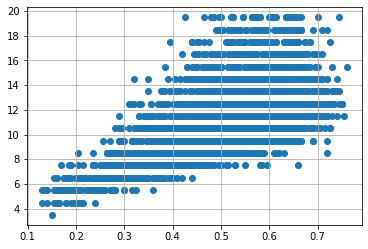

In [ ]:
var = 'Length'
plt.scatter(x = df[var], y = df['age'])
plt.grid(True)

In [ ]:
df.drop(df[(df['Length'] <0.1) &(df['age'] < 5)].index, inplace = True)
df.drop(df[(df['Length']<0.8) & (df['age'] > 25)].index, inplace = True)
df.drop(df[(df['Length']>=0.8) & (df['age'] < 25)].index, inplace = True)

**Feature Selection and Standardization**

In [ ]:
X = df.drop('age', axis = 1)
y = df['age']
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest
standardScale = StandardScaler()
standardScale.fit_transform(X)

selectkBest = SelectKBest()
X_new = selectkBest.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25)

#**MODEL**

**Linear regression**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared Error of training set :%2f'%s)

p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error of testing set :%2f'%p)

Mean Squared Error of training set :3.585767
Mean Squared Error of testing set :3.498307


Note: The Lower the Mean Squared Error,better the forecast.

In [ ]:
from sklearn.metrics import r2_score
s = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)

p = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)

R2 Score of training set:0.54
R2 Score of testing set:0.52


Note: The ideal value of R-square is 1.

The closer the value of R-square to 1,better is the model fitted.